# Project 44: Simulating the Izhikevich spiking neuron model usingthe Brian2 software

## Authors: Julen Etxaniz and Ibon Urbina

## Subject: Machine Learning and Neural Networks

## Date: 22/11/2020

## Objective: The goal of the project is to implement the Izhikevich’s model using the Brian2 Python library https://brian2.readthedocs.io/en/stable/.

## Contents
### 1. Importing the libraries
### 2. Defining the model
### 3. Interacting with the model
### 4. Neuron Types

# 1. Importing the libraries

In [1]:
%matplotlib inline
from brian2 import *
import ipywidgets as ipw

# 2. Defining the model

<figure>
  <img src="model.png" alt="Neuron Model">
  <figcaption>Figure 1. Neuron Model. Electronic version of the figure and reproduction permissions are freely available at <a href="http://www.izhikevich.com">http://www.izhikevich.com</a></figcaption>
</figure>

In [2]:
def model(a=0.02, b=0.2, c=-65, d=2, I=10, V=-65, tau=20, duration=1500):
    # Parameters
    tau = tau*ms
    duration = duration*ms
    
    #Simulation
    eqs = '''
    dv/dt = (0.04*v**2+5*v+140-u+I)/tau : 1
    du/dt = (a*(b*v-u))/tau : 1
    '''
    G = NeuronGroup(1, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    G.v = V
    G.u = b*V
    
    statemon = StateMonitor(G, ('v', 'u'), record=0)
    spikemon = SpikeMonitor(G)

    run(duration)
   
    #Plotting
    plot(statemon.t/ms, statemon.v[0], label='v')
    #plot(statemon.t/ms, statemon.u[0], label='u')
    #for t in spikemon.t:
        #axvline(t/ms, ls='--', c='C1')
    axhline(30, ls='-', c='C1', lw=2, label='v=30')
    xlabel('Time (ms)')
    ylabel('v')
    legend()
    #print("Spike times: %s" % spikemon.t[:])

# 3. Interacting with the model

In [3]:
layout = ipw.Layout(width='100%')
style = {'description_width': 'initial'}
ipw.interact(model,
             a=ipw.FloatSlider(value=0.02, min=0.02, max=0.1, step=0.01, continuous_update=False,
                             description="a: time scale of the recovery variable u", style=style, layout=layout),
             b=ipw.FloatSlider(value=0.2, min=0.2, max=0.26, step=0.01, continuous_update=False,
                             description="b: sensitivity of the recovery variable u to the subthreshold fluctuations of the membrane potential v", style=style, layout=layout),
             c=ipw.IntSlider(value=-65, min=-65, max=-50, step=1, continuous_update=False,
                             description="c: after-spike reset value of the membrane potential v", style=style, layout=layout),
             d=ipw.FloatSlider(value=2, min=2, max=8, step=0.1, continuous_update=False,
                             description="d: after-spike reset of the recovery variable u", style=style, layout=layout),
             I=ipw.FloatSlider(value=10, min=1, max=20, step=1, continuous_update=False,
                             description="I: injected dc-current", style=style, layout=layout),
             V=ipw.FloatSlider(value=-65, min=-87, max=-50, step=1, continuous_update=False,
                             description="V: initial membrane potential v", style=style, layout=layout),
             tau=ipw.FloatSlider(value=20, min=1, max=100, step=1, continuous_update=False,
                             description="tau: time resolution", style=style, layout=layout),
             duration=ipw.IntSlider(value=1500, min=100, max=2000, step=1, continuous_update=False,
                             description="duration: length of the simulation", style=style, layout=layout),
             );

interactive(children=(FloatSlider(value=0.02, continuous_update=False, description='a: time scale of the recov…

# 4. Neuron Types
https://www.izhikevich.org/publications/spikes.htm

<figure>
  <img src="types.gif" alt="Neuron Types">
  <figcaption>Figure 2. Neuron Types. Electronic version of the figure and reproduction permissions are freely available at <a href="http://www.izhikevich.com">http://www.izhikevich.com</a></figcaption>
</figure>

## 4.1. Excitatory

### 4.1.1. Regular Spiking (RS)

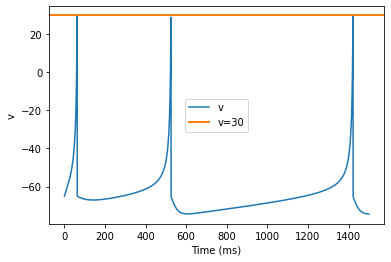

In [4]:
model(d=8)

### 4.1.2. Intrinsically Bursting (IB)

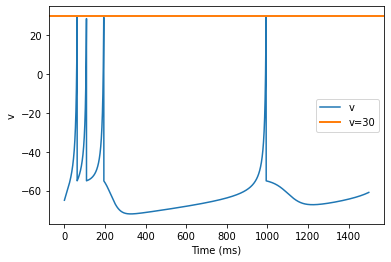

In [5]:
model(c=-55, d=4)

### 4.1.3. Chattering (CH)

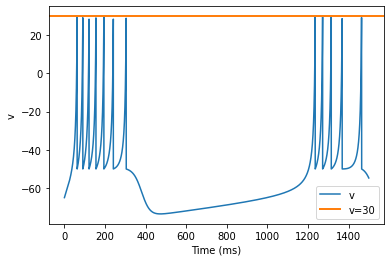

In [6]:
model(c=-50)

## 4.2. Inhibitory

### 4.2.1. Fast Spiking (FS)

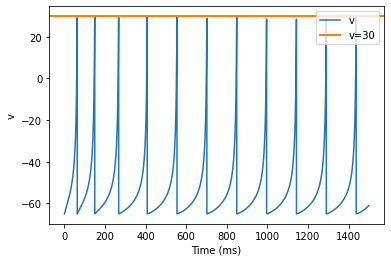

In [7]:
model(a=0.1)

### 4.2.2. Low-Thershold Spiking (LTS)

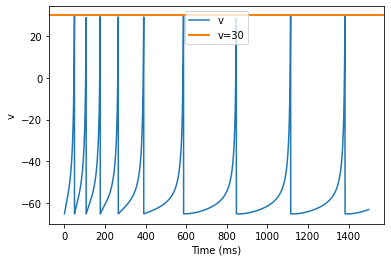

In [8]:
model(b=0.25)

## 4.3. Others

### 4.3.1 Thalamo-Cortical (TC)

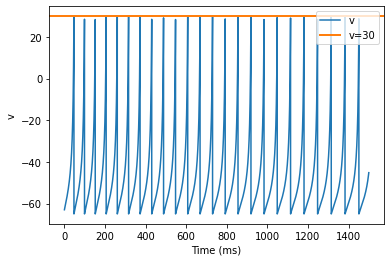

In [9]:
model(b=0.25, d=0.05, V=-63)

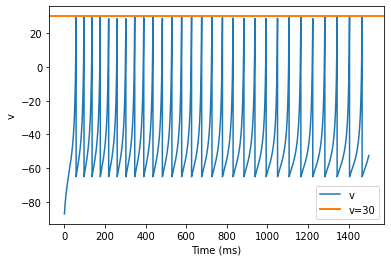

In [10]:
model(b=0.25, d=0.05, V=-87)

### 4.3.2 Resonator (RZ)

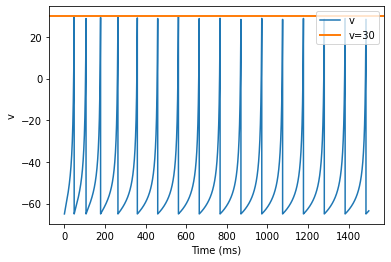

In [11]:
model(a=0.1, b=0.26)

# 5. Defining the simulation
https://www.izhikevich.org/publications/net.m

```
% Created by Eugene M. Izhikevich, February 25, 2003
% Excitatory neurons    Inhibitory neurons
Ne=800;                 Ni=200;
re=rand(Ne,1);          ri=rand(Ni,1);
a=[0.02*ones(Ne,1);     0.02+0.08*ri];
b=[0.2*ones(Ne,1);      0.25-0.05*ri];
c=[-65+15*re.^2;        -65*ones(Ni,1)];
d=[8-6*re.^2;           2*ones(Ni,1)];
S=[0.5*rand(Ne+Ni,Ne),  -rand(Ne+Ni,Ni)];

v=-65*ones(Ne+Ni,1);    % Initial values of v
u=b.*v;                 % Initial values of u
firings=[];             % spike timings

for t=1:1000            % simulation of 1000 ms
  I=[5*randn(Ne,1);2*randn(Ni,1)]; % thalamic input
  fired=find(v>=30);    % indices of spikes
  firings=[firings; t+0*fired,fired];
  v(fired)=c(fired);
  u(fired)=u(fired)+d(fired);
  I=I+sum(S(:,fired),2);
  v=v+0.5*(0.04*v.^2+5*v+140-u+I); % step 0.5 ms
  v=v+0.5*(0.04*v.^2+5*v+140-u+I); % for numerical
  u=u+a.*(b.*v-u);                 % stability
end;
plot(firings(:,1),firings(:,2),'.');
```

<figure>
  <img src="simulation.png" alt="Simulation">
  <figcaption>Figure 3. Simulation</figcaption>
</figure>

In [18]:
def simulation(V=-65, tau=20, duration=1000):
    # Parameters
    Ne = 800
    Ni = 200
    
    b = 0.2
    
    tau = tau*ms
    duration = duration*ms
    
    #Simulation
    eqs = '''
    dv/dt = (0.04*v**2+5*v+140-u+I)/tau : 1
    du/dt = (a*(b*v-u))/tau : 1
    I : 1
    a : 1
    b : 1
    c : 1
    d : 1
    '''
    Ge = NeuronGroup(Ne, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    Gi = NeuronGroup(Ni, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    Ge.v = V
    Ge.u = b*V
    Ge.a = 0.02
    Ge.b = 0.2
    Ge.c = -65+15*rand()**2
    Ge.d = 8-6*rand()**2
    Gi.v = V
    Gi.u = b*V
    Gi.a = 0.02+0.08*rand()
    Gi.b = 0.25-0.05*rand()
    Gi.c = -65
    Gi.d = 2
    
    See = Synapses(Ge, Ge, 'w : 1', on_pre='I_post += w')
    See.connect()
    See.w = 0.5*rand()
    Sei = Synapses(Ge, Gi, 'w : 1', on_pre='I_post += w')
    Sei.connect()
    Sei.w = 0.5*rand()
    Sie = Synapses(Gi, Ge, 'w : 1', on_pre='I_post += w')
    Sie.connect()
    Sie.w = -rand()
    Sii = Synapses(Gi, Gi, 'w : 1', on_pre='I_post += w')
    Sii.connect()
    Sii.w = -rand()
    
    Me = StateMonitor(Ge, 'v', record=True)
    Se = SpikeMonitor(Ge)
    Mi = StateMonitor(Gi, 'v', record=True)
    Si = SpikeMonitor(Gi)
    
    Ge.run_regularly('I = 5*rand()', dt=tau) #np.random.normal()
    Gi.run_regularly('I = 2*rand()', dt=tau) #np.random.normal()

    run(duration)
   
    #Plotting
    figure(figsize=(10, 4))
    plot(Me.t/ms, Me.v.T, c='C0')
    plot(Mi.t/ms, Mi.v.T, c='C2')
    #for t in spikemon.t:
        #axvline(t/ms, ls='--', c='C1')
    axhline(30, ls='-', c='C1', lw=2, label='v=30')
    xlabel('Time (ms)')
    ylabel('v')
    #legend()
    #print("Spike times: %s" % spikemon.t[:])

# 6. Running the simulation

WARNING    "b" is an internal variable of group "neurongroup_4", but also exists in the run namespace with the value 0.2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "b" is an internal variable of group "neurongroup_5", but also exists in the run namespace with the value 0.2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


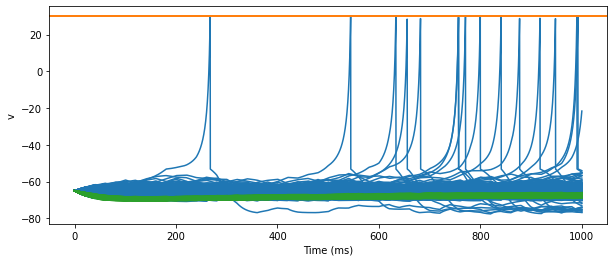

In [19]:
simulation()